In [ ]:
# fixed acidity     비휘발성 산
# volatile acidity     휘발성 산
# citric acid     구연산(시트르산)

# ---------------------------------

# residual sugar     잔당
# chlorides     염화물
# free sulfur dioxide     유리 이산화황
# total sulfur dioxide     총 이산화황
# density     밀도
# pH     산도(수소 이온 농도)


# sulphates     황산염, 아황산염


# alcohol     알코올
# ----------------------------------------
# quality     와인 품질(나쁨 : 0 ~ 좋음 : 10)

# 'A' = 35
# 'B' = 10                      
# 'C' = 15wine_quality
# 'D' = 25
# 'E' = 15
# 'F' = 20
# 'G' = 30
# 'H' = 10

In [31]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import sklearn
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from collections import Counter


import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir('./data'))

['wine_area_grade.csv', 'wine-data_dictionary.csv', 'wine_frequency.csv', 'wine_side.csv', 'wine_raw_data_group.csv', 'wine_quality_white.csv', 'wine_data_preference.csv', 'wine_quality_red.csv', 'wine_area_province.csv', 'wine_data_sales.csv']


In [2]:
origin_data = pd.read_csv('./data/wine_quality_red.csv')
origin_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
origin_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
scaler = StandardScaler()
df_raw_scaled = scaler.fit_transform(origin_data)
df_raw_scaled[:5]

array([[-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228,  0.04341614,  0.2238752 ,
         0.87263823,  0.62436323,  0.02826077, -0.7199333 ,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, -0.16942723,  0.09635286,
        -0.08366945,  0.22904665,  0.13426351, -0.33117661, -0.04808883,
        -0.58477711, -0.78782264],
       [ 1.65485608, -1.38444349,  1.4841536 , -0.45321841, -0.26496041,
         0.10759209,  0.41150046,  0.6642772 , -0.97910442, -0.46118037,
        -0.58477711,  0.45084835],
       [-0.52835961,  0.96187667, -1.39147228, -0.45321841, -0.24370669,
        -0.46619252, -0.37913269,  0.55827446,  1.28864292, -0.57920652,
        -0.96024611, -0.78782264]])

In [5]:
df_raw_scaled[:, -1]

array([-0.78782264, -0.78782264, -0.78782264, ...,  0.45084835,
       -0.78782264,  0.45084835])

In [6]:
df_y = df_raw_scaled[:,-1]
df_x = df_raw_scaled[:, :-1]

In [7]:
df_x

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [8]:
df_y

array([-0.78782264, -0.78782264, -0.78782264, ...,  0.45084835,
       -0.78782264,  0.45084835])

Text(0, 0.5, 'sample index')

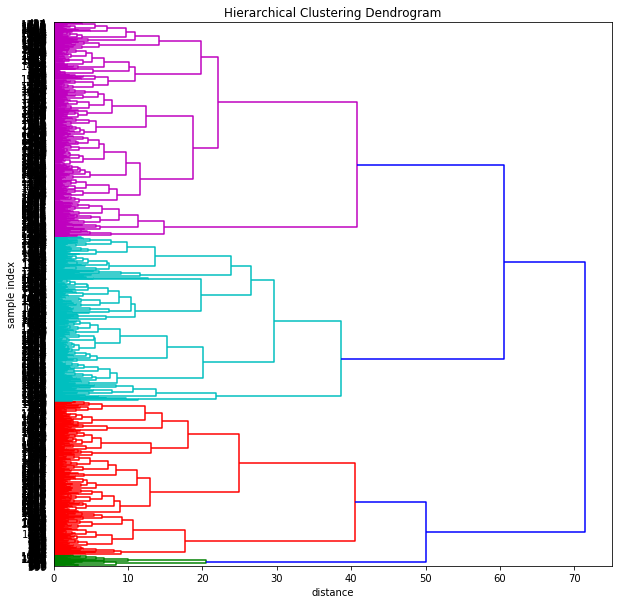

In [9]:
Z_ward = linkage(df_x, method = 'ward', metric = 'euclidean')
Z_average = linkage(df_x, method = 'average', metric = 'euclidean')
Z_Minkowski = linkage(df_x, method = 'average', metric = 'minkowski')

plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_ward, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

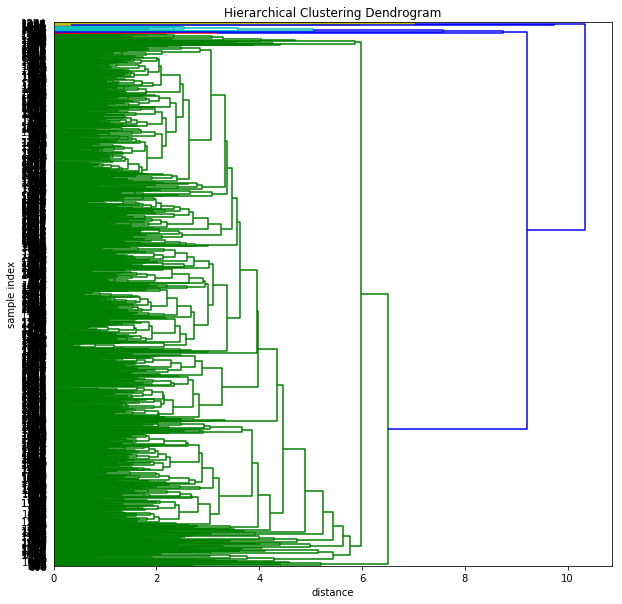

In [11]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_average, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

Text(0, 0.5, 'sample index')

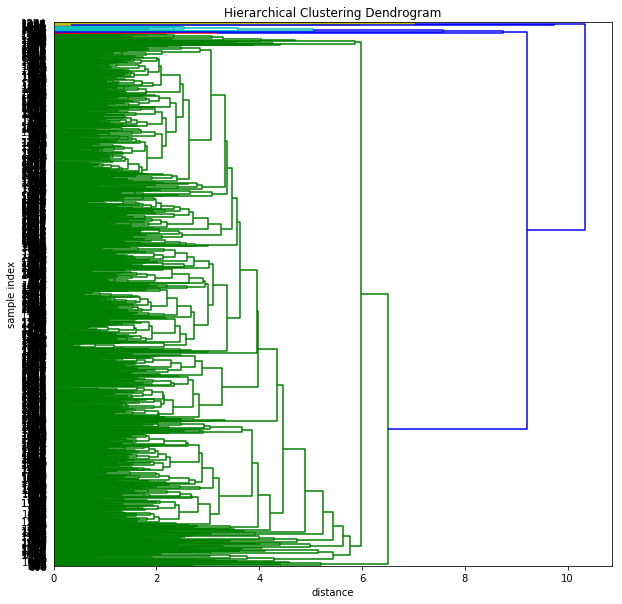

In [12]:
plt.figure(figsize = (10, 10))
ax = plt.subplot(111)
dendrogram(Z_Minkowski, leaf_font_size=10, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('distance')
plt.ylabel('sample index')

In [43]:
cluster_hierarchical = fcluster(Z = Z_ward, t = 35, criterion = 'distance')
origin_data['clust_grade'] = cluster_hierarchical
origin_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clust_grade
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,7
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,7
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,7


In [44]:
origin_data['clust_grade'].unique()

array([7, 5, 4, 1, 3, 6, 2])

In [53]:
Counter(origin_data['clust_grade'])

Counter({7: 530, 5: 437, 4: 48, 1: 33, 3: 327, 6: 99, 2: 125})

In [46]:
ds_summary_hc = origin_data.groupby('clust_grade').agg(['min', 'mean', 'max'])
level0 = ds_summary_hc.columns.get_level_values(0)
level1 = ds_summary_hc.columns.get_level_values(1)
ds_summary_hc.columns = level0 + '_' + level1
ds_summary_hc.reset_index(inplace = True)
ds_summary_hc.round(3)

,clust_grade,fixed acidity_min,fixed acidity_mean,fixed acidity_max,volatile acidity_min,volatile acidity_mean,volatile acidity_max,citric acid_min,citric acid_mean,citric acid_max,...,pH_max,sulphates_min,sulphates_mean,sulphates_max,alcohol_min,alcohol_mean,alcohol_max,quality_min,quality_mean,quality_max
0,1,7.3,8.658,11.0,0.20,0.528,0.780,0.20,0.498,1.00,...,3.32,0.60,1.044,2.00,8.4,9.406,10.7,3,5.364,7
1,2,9.9,12.084,15.9,0.18,0.438,0.840,0.39,0.564,0.79,...,3.30,0.43,0.708,1.36,8.4,10.425,14.9,3,5.952,8
2,3,5.8,8.843,11.9,0.12,0.359,0.705,0.02,0.421,0.69,...,3.61,0.46,0.720,1.20,8.7,11.197,14.0,4,6.183,8
3,4,5.6,7.783,10.7,0.24,0.529,0.900,0.00,0.301,0.78,...,3.47,0.45,0.679,1.14,8.8,9.952,12.1,4,5.375,7
4,5,5.2,8.369,12.5,0.18,0.515,1.240,0.00,0.287,0.70,...,3.62,0.39,0.666,1.98,8.5,10.093,12.9,3,5.476,8
5,6,4.6,6.000,8.0,0.34,0.596,1.040,0.00,0.084,0.66,...,4.01,0.37,0.625,0.94,10.1,12.199,14.0,4,5.909,8
6,7,5.3,7.529,10.7,0.29,0.651,1.580,0.00,0.114,0.44,...,3.69,0.33,0.582,0.98,9.0,9.991,12.2,3,5.345,7


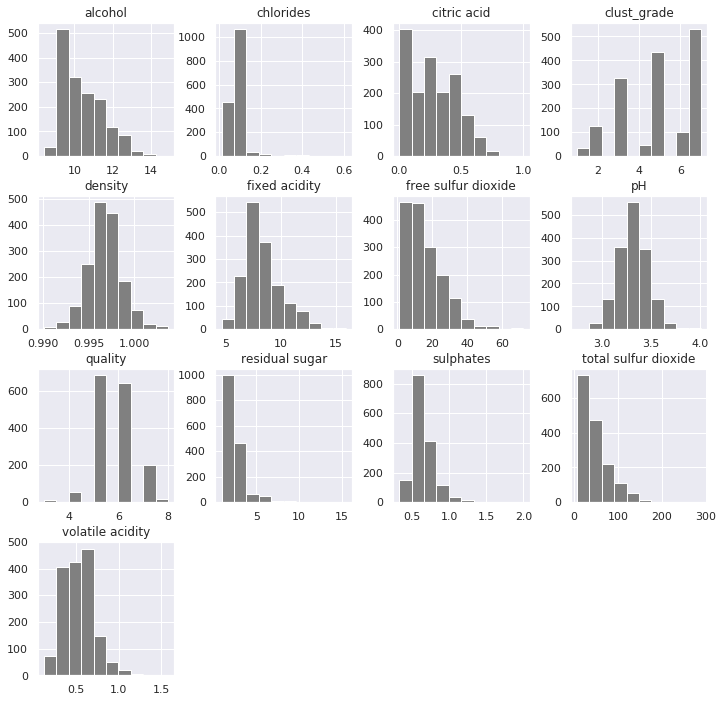

In [54]:
sns.set()
origin_data.hist(figsize=(12,12), color='gray')
plt.show()

In [ ]:
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = list()
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_x)
    clus_error.append(clus.inertia_)
ds_error = pd.DataFrame({'NumberofCluster':cluster_range, 'Error':clus_error})